In [1]:
from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier # this import the SGDClassifier model
from sklearn.ensemble import RandomForestClassifier # this import the Random Forest classifier model
from sklearn.neighbors import KNeighborsClassifier # this import the KNeighbors classifier model
from sklearn.dummy import DummyClassifier # this import a dummy classifer

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve

import numpy as np, matplotlib.pyplot as plt

In [2]:
# Data Preparation

mnist = fetch_openml("mnist_784", version = 1)
y, X = mnist["target"], mnist["data"]
y = y.astype(np.uint8)

y_train, y_test = y[:60000], y[60000:]
X_train, X_test = X[:60000], X[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5)

first_digit = X[0]
first_digit_reshape = first_digit.reshape(28,28)
first_digit_solution = y[0]

In [3]:
# SGDClassifier

sgd_classifier = SGDClassifier(random_state = 42)
sgd_classifier.fit(X_train, y_train_5)

y_train_5_sgd_accuracy = cross_val_score(sgd_classifier, X_train, y_train_5, cv = 3, scoring = "accuracy")
y_train_5_sgd_prediction = cross_val_predict(sgd_classifier, X_train, y_train_5, cv = 3)
y_train_5_sgd_prediction_score = cross_val_predict(sgd_classifier, X_train, y_train_5, cv = 3, method = "decision_function")

sgd_accuracy_score = accuracy_score(y_train_5, y_train_5_sgd_prediction)
sgd_precision_rate = precision_score(y_train_5, y_train_5_sgd_prediction) 
sgd_recall_rate = recall_score(y_train_5, y_train_5_sgd_prediction) 
sgd_f1_rate = f1_score(y_train_5, y_train_5_sgd_prediction) 
sgd_roc_auc_score = roc_auc_score(y_train_5, y_train_5_sgd_prediction_score)

sgd_precision, sgd_recall, sgd_threshold = precision_recall_curve(y_train_5, y_train_5_sgd_prediction_score)
sgd_fpr, sgd_tpr, sgd_threshold_roc = roc_curve(y_train_5, y_train_5_sgd_prediction_score)

# RANDOM FOREST CLASSIFIER

forest_classifer = RandomForestClassifier(n_estimators = 100, random_state = 42) # n_estimators = 100 is the default value

y_train_5_forest_prediction_proba_class = cross_val_predict(forest_classifer, X_train, y_train_5, cv = 3, method = "predict_proba")
y_train_5_forest_prediction = cross_val_predict(forest_classifer, X_train, y_train_5, cv = 3, method = "predict")
y_train_5_forest_prediction_score = y_train_5_forest_prediction_proba_class[:,1]

forest_accuracy_score = accuracy_score(y_train_5, y_train_5_forest_prediction)
forest_precision_rate = precision_score(y_train_5, y_train_5_forest_prediction)
forest_recall_rate = recall_score(y_train_5, y_train_5_forest_prediction)
forest_f1_rate = f1_score(y_train_5, y_train_5_forest_prediction)
forest_roc_auc_score = roc_auc_score(y_train_5, y_train_5_forest_prediction_score)

forest_precision, forest_recall,forest_thresholds = precision_recall_curve(y_train_5, y_train_5_forest_prediction_score)
forest_fpr, forest_tpr, forest_threshold_roc = roc_curve(y_train_5, y_train_5_forest_prediction_score)

In [4]:
def print_metrics(accuracy,precision, recall, f1, roc_auc_score):
    print("Accuracy rate : " + str(round(accuracy * 100,1)))
    print("Precision rate : " + str(round(precision * 100,1)))
    print("Recall rate : " + str(round(recall * 100,1)))
    print("F1_score : " + str(round(f1 * 100,1)))
    print("ROC AUC Score : " + str(round(roc_auc_score * 100,1)))

In [5]:
# Score for SGDClassifier
print_metrics(sgd_accuracy_score, sgd_precision_rate, sgd_recall_rate, sgd_f1_rate, sgd_roc_auc_score)

Accuracy rate : 95.7
Precision rate : 83.7
Recall rate : 65.1
F1_score : 73.3
ROC AUC Score : 96.0


In [6]:
# Score for Random Forest Classifier
print_metrics(forest_accuracy_score, forest_precision_rate, forest_recall_rate, forest_f1_rate,forest_roc_auc_score)

Accuracy rate : 98.7
Precision rate : 99.1
Recall rate : 86.6
F1_score : 92.4
ROC AUC Score : 99.8


Text(0.5, 1.05, 'ROC curve of SGDClassifier and Random Forest Classifier')

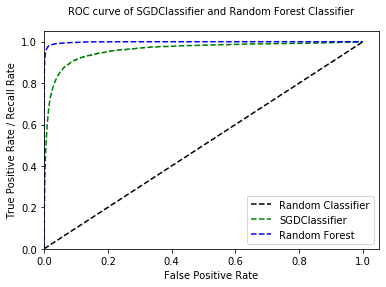

In [7]:
plt.plot([0,1],[0,1], "k--", label = "Random Classifier")
plt.plot(sgd_fpr, sgd_tpr, "g--", label = "SGDClassifier")
plt.plot(forest_fpr, forest_tpr, "b--", label = "Random Forest")
plt.grid(False)
plt.legend(fontsize = 10)
plt.axis([0,1.05,0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate / Recall Rate")
plt.title("ROC curve of SGDClassifier and Random Forest Classifier", fontsize = 10, y = 1.05)

Text(0.5, 1.05, 'Precision / Recall / Threshold -- SGDClassifier')

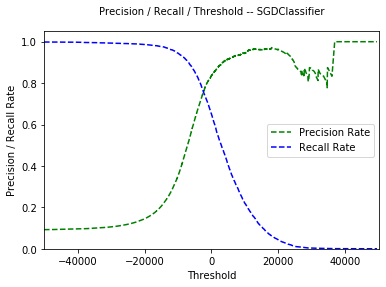

In [8]:
plt.plot(sgd_threshold, sgd_precision[:-1], "g--", label = "Precision Rate")
plt.plot(sgd_threshold, sgd_recall[:-1], "b--", label = "Recall Rate")
plt.legend(fontsize = 10, loc = "center right")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall Rate")
plt.axis([-50000,50000,0,1.05])
plt.title("Precision / Recall / Threshold -- SGDClassifier", fontsize = 10, y = 1.05)

Text(0.5, 1.05, 'Precision / Recall / Threshold -- Random Forest Classifier')

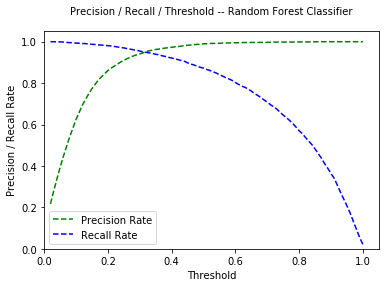

In [9]:
plt.plot(forest_thresholds, forest_precision[:-1], "g--", label = "Precision Rate")
plt.plot(forest_thresholds, forest_recall[:-1], "b--", label = "Recall Rate")
plt.legend(fontsize = 10, loc = "center center")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall Rate")
plt.axis([0,1.05,0,1.05])
plt.title("Precision / Recall / Threshold -- Random Forest Classifier", fontsize = 10, y = 1.05)

# KNN Classifier

In [10]:
knn_classifier = KNeighborsClassifier(weights = "distance", n_neighbors = 4)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [14]:
y_knn_prediction = knn_classifier.predict(X_test) # note that we are predicting the test data set

In [17]:
# note that you are comparing against the test dataset (y_test) as you are predicting the test dataset (X_test)
knn_accuracy_score = accuracy_score(y_test, y_knn_prediction) 
print(knn_accuracy_score)

0.9714


# Dummy Classifier

In [11]:
dummy_classifier = DummyClassifier()

y_train_5_dummy_prediction_proba_class = cross_val_predict(dummy_classifier, X_train, y_train_5 , cv = 3, method = "predict_proba")
y_train_5_dummy_prediction = cross_val_predict(dummy_classifier, X_train, y_train_5 , cv = 3, method = "predict")
y_train_5_dummy_prediction_score = y_train_5_dummy_prediction_proba_class[:,1]

dummy_precision, dummy_recall, dummy_threshold = precision_recall_curve(y_train_5, y_train_5_dummy_prediction_score)
dummy_fpr, dummy_tpr, dummy_thresholds = roc_curve(y_train_5, y_train_5_dummy_prediction_score)

[0, 1, 0, 1]

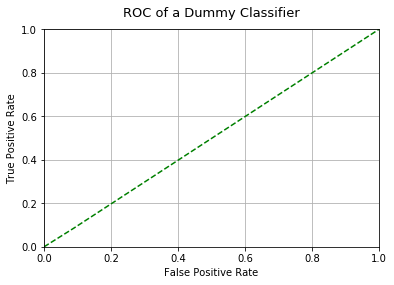

In [12]:
plt.plot(dummy_fpr, dummy_tpr, "g--", label ="Dummy Classifier")
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of a Dummy Classifier", fontsize = 13, y = 1.03)
plt.axis([0,1,0,1])

Text(0.5, 1.05, 'Precision / Recall / Threshold Curve - Dummy Classifier')

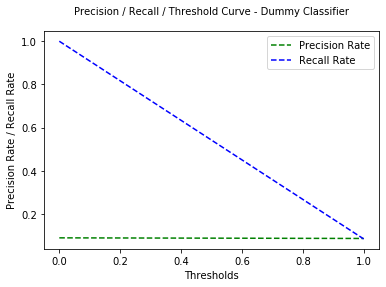

In [13]:
plt.plot(dummy_threshold, dummy_precision[:-1], "g--", label = "Precision Rate")
plt.plot(dummy_threshold, dummy_recall[:-1], "b--", label = "Recall Rate")
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("Precision Rate / Recall Rate")
plt.title("Precision / Recall / Threshold Curve - Dummy Classifier", fontsize = 10, y = 1.05)